# Real Estate Price Prediction

Saleem Salavudheen,Shaun Fernandes






# Introduction

Purchasing a home is one of the most significant financial decisions a person makes in their lifetime. Several factors influence this decision: the location of the property, its size, proximity to essential amenities such as offices, schools, parks, restaurants, hospitals, and even the aesthetic appeal of features like the stereotypical white picket fence. However, arguably the most crucial factor is the price of the property.

In recent years, the real estate market in India, and particularly in Bengaluru, has undergone considerable changes. The lingering impact of demonetization, and a growing lack of trust in property developers have led to a noticeable shift in the housing market dynamics. For instance, housing units sold across India in 2017 dropped by 7 percent, and property prices in Bengaluru fell by nearly 5 percent in the latter half of 2017, as reported by Knight Frank.

For a potential homeowner in Bengaluru, the market offers a diverse range of options. According to a report by the property website Makaan, there are over 9,000 apartment projects and flats available in the ₹42-52 lakh price range, followed by more than 7,100 apartments in the ₹52-62 lakh budget segment. Additionally, there are over 5,000 projects in the ₹15-25 lakh range and those in the ₹34-43 lakh budget category.

Buying a home in a city like Bengaluru is a complex decision influenced by various factors. While the primary considerations remain consistent across different metropolitan areas, Bengaluru, often referred to as the Silicon Valley of India, has unique attributes that affect its real estate market. The city's millennial crowd, vibrant culture, favorable climate, and plethora of job opportunities add layers of complexity to determining property prices.

In this analysis, we aim to explore the critical factors that influence property prices in Bengaluru. By leveraging data on various aspects of the housing market, we will answer key questions such as: What are the predominant factors affecting property prices in Bengaluru? How do location, size, and proximity to amenities impact property valuations? Why is understanding these factors crucial for potential homebuyers?

# Data Curation

In this section, we will use the pandas to describe the data and look for patterns to potentially perform our data analysis on.

We will be using a dataset consisting of Bengaluru house data which includes area type,availabily,location and more. All of our data comes from the following Kaggle link:https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

In [151]:
#Read house data into dataset
filepath = 'Bengaluru_House_Data.csv'
house_df = pd.read_csv(filepath)
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


The above dataset contains 9 different columns including the location,size and price of the house.

In [152]:
#Initial structure
house_data_columns=house_df.shape[1]
house_data_rows=house_df.shape[0]

print("Categories in the dataset: ")
print(house_data_columns)
print("Entries in the dataset: ")
print(house_data_rows)


Categories in the dataset: 
9
Entries in the dataset: 
13320


In [153]:
house_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

The columns in this dataset are :

*   area_type: The type of area in which the property is located (e.g., Super built-up Area, Built-up Area, Plot Area, Carpet Area).
*   availability: The availability status of the property (e.g., Ready to Move, Under Construction).

*   location: The specific location or neighborhood within Bengaluru where the property is situated.
*   size: The size of the property in terms of the number of bedrooms (e.g., 2 BHK, 3 BHK).
*  society: The name of the housing society or residential complex.
*  total_sqft: The total area of the property in square feet.
bath: The number of bathrooms in the property.
*  balcony: The number of balconies in the property.
*  price: The price of the property in lakhs (₹).





In [154]:
data=house_df.copy()
data.groupby('area_type')['area_type'].agg('count')    # taking the 'area_type' column as a group and counting its values

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [155]:
data2 = data.drop(['area_type','society','balcony','availability'], axis='columns')     # dropping useless columns
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


After analyzing the data,we decided to only use the most important features to predicts the price.The features we decided to use are:location,size,total_sqft(area),no of bathroom and the target price column

In [156]:
data2.isnull().sum()     # finding total empty values in each column

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [157]:
data3 = data2.dropna()    # dropping 'NA' values
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

We have cleaned the data by removing every null value in the selected columns.

In [158]:
data3.shape

(13246, 5)

After removing the null row and the colums of lesser importances,we are now left with 13246 rows and 5 columns

In [159]:
data3['size'].unique()    # checking unique values in size column
data3['size'].value_counts() #frequency of each rows

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [160]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))    # getting the number of bedrooms from size column

<ipython-input-160-3d8702cc8485>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))    # getting the number of bedrooms from size column


In [161]:
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [162]:
data3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [163]:
data3[data3.bhk>20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Since most model require number to work on,we have created a new column bhk to indicate the no of bedroom by taking only the number part of the size column data.



In [164]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [165]:
def is_float(x):
    '''
    Function to convert values into float dtype.
    '''
    try:
        float(x)
    except:
        return False
    return True

In [166]:
data3[~data3['total_sqft'].apply(is_float)].head(20)    # finding values those not got converted

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [167]:
def convert_sqft_to_sum(x):
    '''
    Function to convert those unusual format of data
    '''
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [168]:
convert_sqft_to_sum('2100 - 2850')    # usage of the function

2475.0

In [169]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_sqft_to_sum)
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


We have created and applied a function convert_sqft_to_sum to convert the previous data of different formats into numerical input for the prediction model

In [170]:
data4.loc[30]    # loc function is used to see data row-wise

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [171]:
data5 = data4.copy()    # copy function is used to copy the whole dataframe
data5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [172]:
data5['price_per_sqft'] = data5['price'] * 100000/data5['total_sqft']    # making a new column in the dataframe named `price_per_sqft`

Here we have added a feature price_per_sqft to use as input column for the model and potentially increasing the accuracy

In [173]:
len(data5.location.unique())

1304

In [174]:
data5.location = data5.location.apply(lambda x : x.strip())    # strip is used to remove the white spaces around the data points

location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending=False)    # sorting the location column in descending order
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [175]:
len(location_stats[location_stats<=10])    # totaling the minor locations

1052

In [176]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [177]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)    # changing minor locations into `other`

In [178]:
len(data5.location.unique())

242

Now we have analyzed the location column formant the text to the same format and tried to identify any outlier if any

In [179]:
data5[data5.total_sqft / data5.bhk < 300].head()    # checking for outliners; like a house with 1407 sq. area can't have 6 bedrooms

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [180]:
data5.shape

(13246, 7)

In [181]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]

In [182]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [183]:
data6.shape

(12502, 7)

#  Data Cleaning
In this section, we will find outliers and try to remove them.

In [184]:
def remove_pps_outliers(df):
    '''
    Function to clear stuff (outliers) in the price_per_sqft column
    '''
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [185]:
data7 = remove_pps_outliers(data6)
data7.shape

(10241, 7)

In [186]:
data7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [187]:
def remove_bhk_outliers(df):
    '''
    Function to clear stuff (outliers) in the bhk column
    '''
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data8 = remove_bhk_outliers(data7)
data8.shape

(7329, 7)

We have successfully identified and removed all outlier in the dataset.

The first function, remove_pps_outliers, aims to clean the data by eliminating outliers in the price_per_sqft column. It works by grouping the data based on the location of the properties. For each location, it calculates the mean and standard deviation of the price per square foot. Then, it filters out any properties whose price per square foot falls outside the range of one standard deviation from the mean, effectively keeping only those properties within a reasonable range of prices for that location.

The second function, remove_bhk_outliers, focuses on removing outliers related to the number of bedrooms (BHK). It groups the data by location and then further by the number of bedrooms. For each combination, it calculates statistics such as the mean and standard deviation of the price per square foot. The function then identifies and excludes properties with a significantly lower price per square foot compared to properties with one less bedroom in the same location, but only if there are more than five such properties. This method ensures that unusually low-priced properties, which could distort the analysis, are removed.

# Exploratory data analysis

Now we can visualize our data to use for the model

In [188]:
def plot_scatter_chart(df,location):
    '''
    Function that will help us to visualize the data of the different locations
    '''
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+',color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

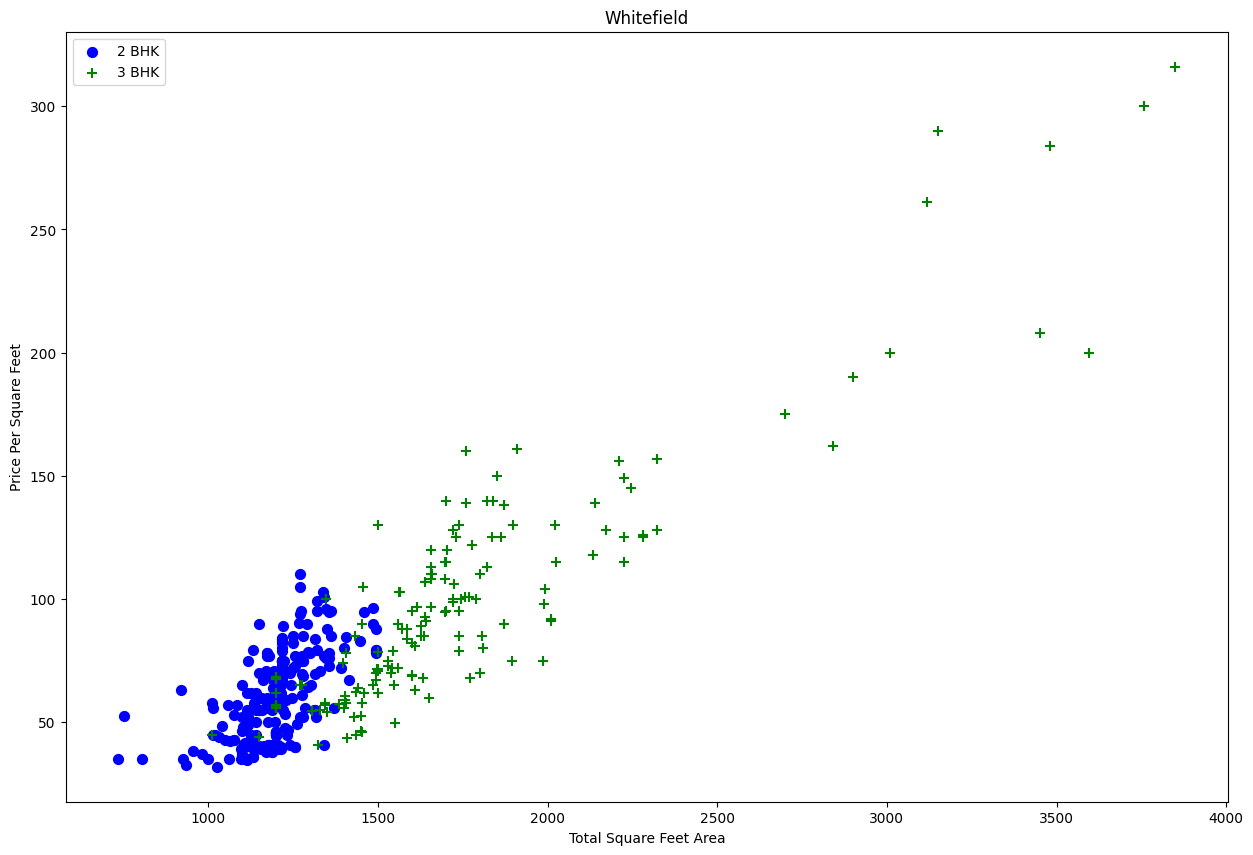

In [189]:
plot_scatter_chart(data7, 'Whitefield')

The function filters the dataset to isolate properties in a specified location, further distinguishing between 2 BHK and 3 BHK properties.Using Matplotlib, the function plots a scatter chart where each point represents a property. The x-axis shows the total square feet area, and the y-axis indicates the price per square foot. In the plot for the 'Whitefield' location, blue dots represent 2 BHK properties, while green crosses denote 3 BHK properties. This visual comparison helps identify trends and differences in pricing between 2 BHK and 3 BHK homes in the same area, revealing how larger properties typically command a higher price per square foot.

Similarly below for another location

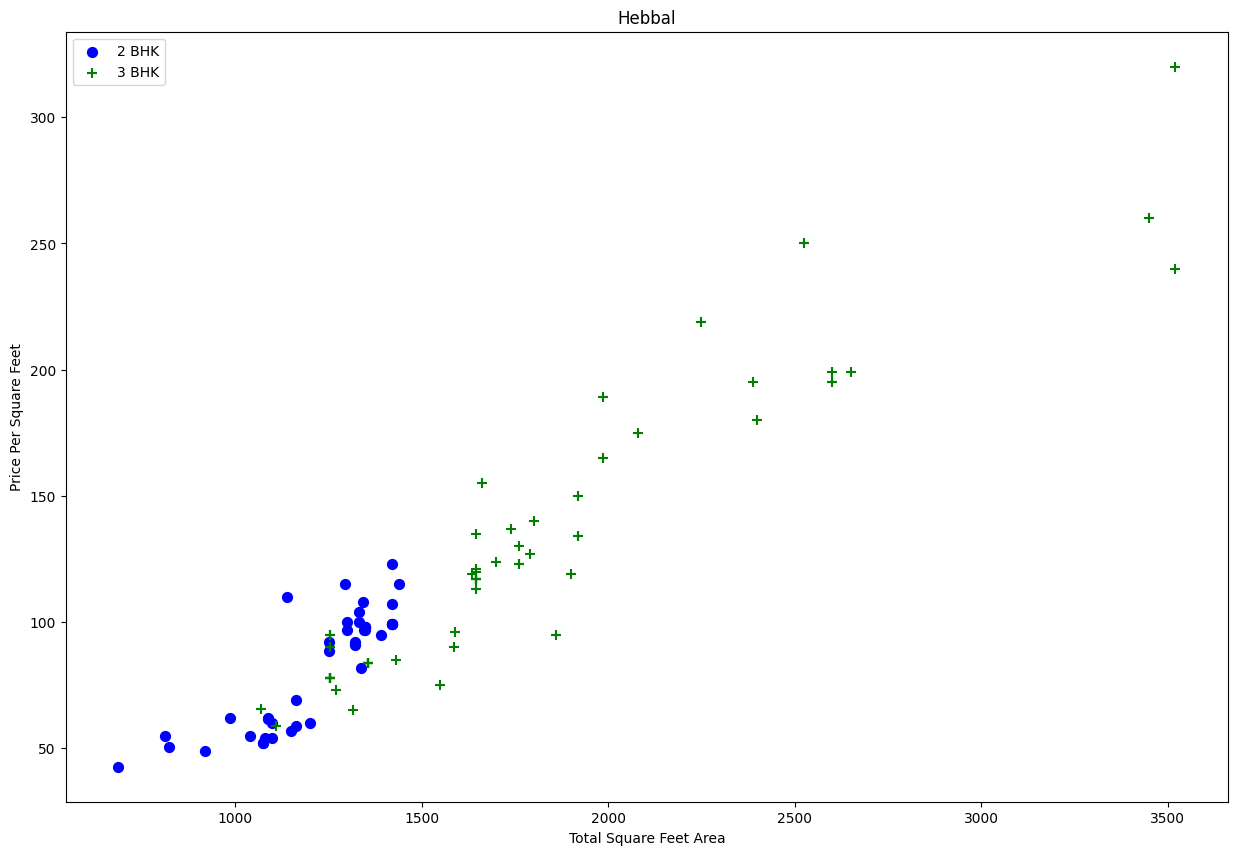

In [190]:
plot_scatter_chart(data7,"Hebbal")

Text(0, 0.5, 'Count')

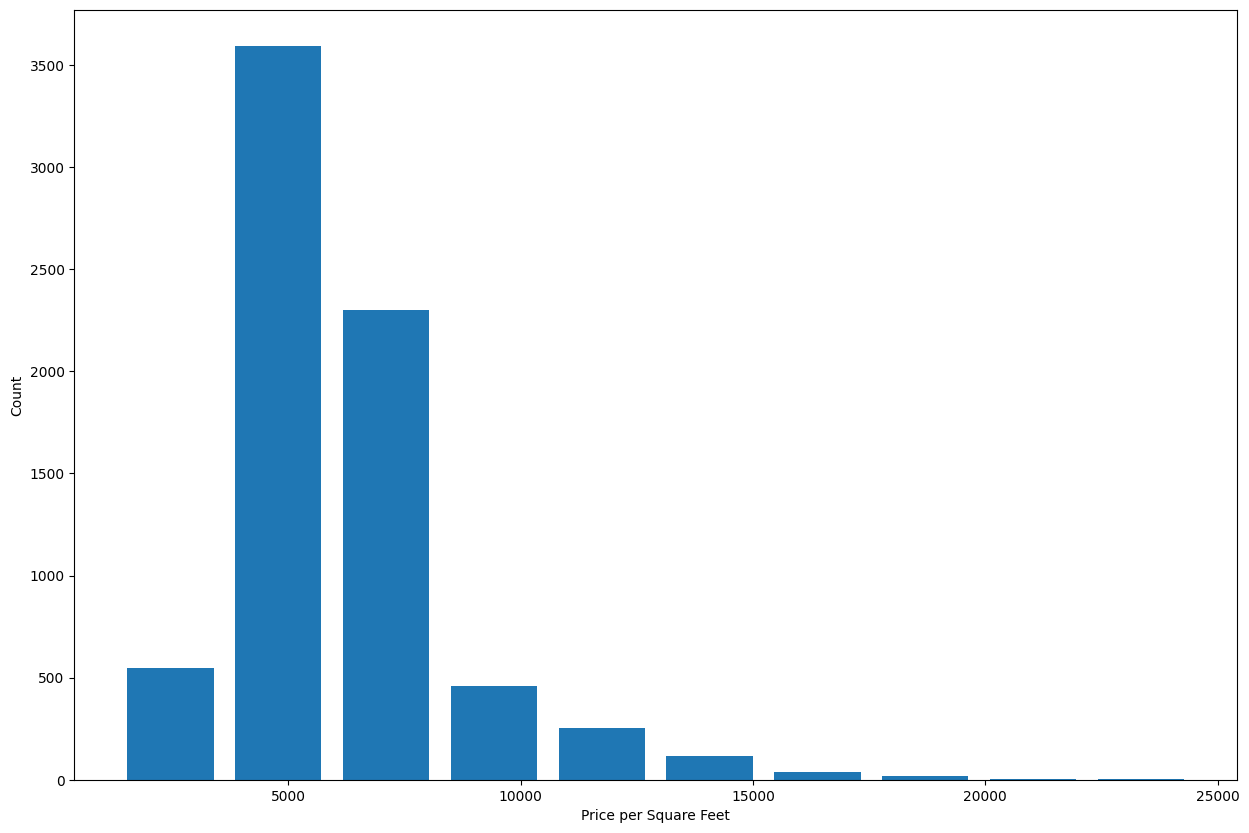

In [191]:
plt.hist(data8.price_per_sqft, rwidth=0.8)    # visualization the price_per_sqft column
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

The x-axis represents the price per square foot, while the y-axis indicates the count of properties falling within each price range. The histogram reveals that the majority of properties are priced between ₹5,000 and ₹10,000 per square foot, with a significant concentration around ₹5,000. This visualization helps in understanding the overall pricing trends and the common price brackets for properties in Bengaluru, highlighting where most properties fall in terms of their price per square foot.

In [192]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [193]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

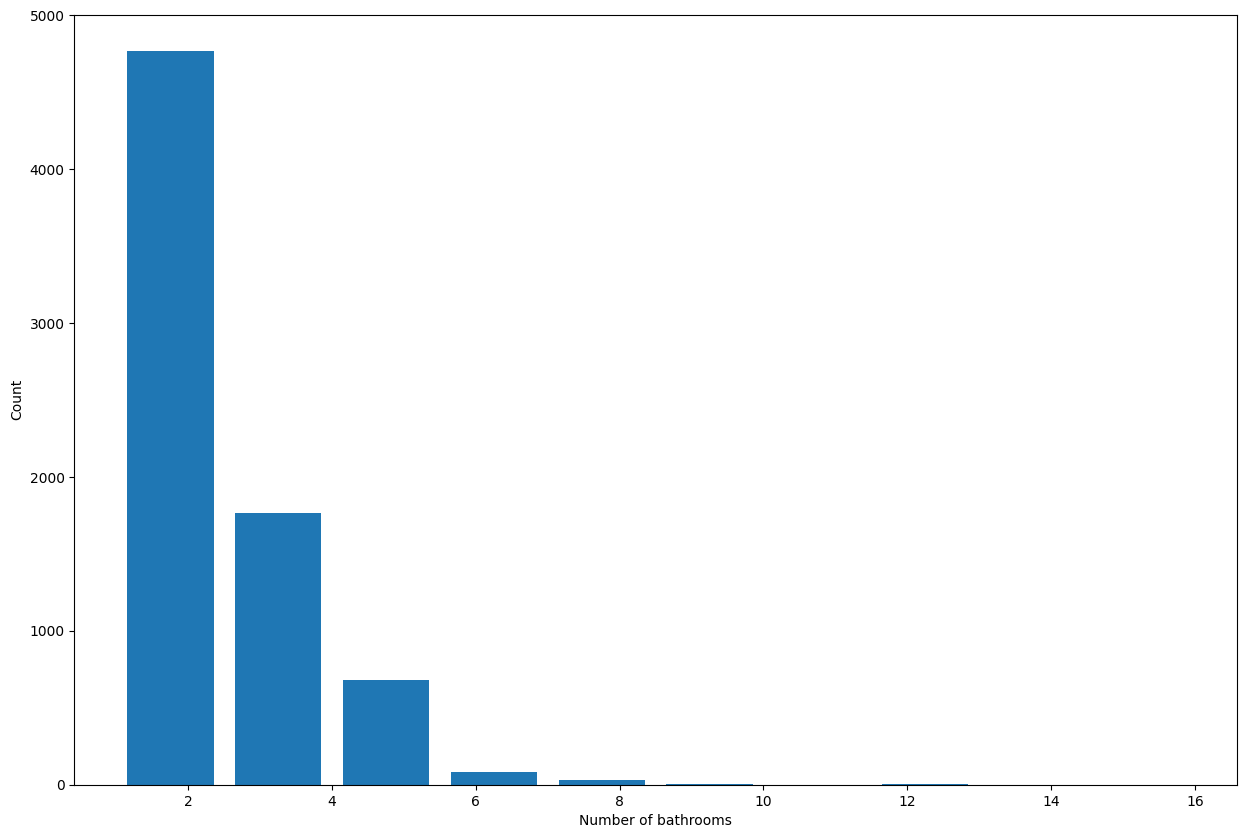

In [194]:
plt.hist(data8.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [195]:
data8[data8.bath > data8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [196]:
data9 = data8[data8.bath < data8.bhk + 2]
data9.shape

(7251, 7)

In [197]:
data9.sample()    # sample return a random row from the dataset

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4907,Malleshwaram,3 BHK,2475.0,4.0,332.0,3,13414.141414


In [198]:
data10 = data9.drop(['size',"price_per_sqft"],axis='columns')    # removing or dropping 'size' and 'prize_per_sqft' as we don't require them any more
data10.head()


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


On further analysis of the data,we found some rows with impossible value like ros where the no of bathroom are more than no of bedroom.Now we are left with 7248 rows and 5 columns.

Also,we removed the unwanted columns like size and prize_per_feet as we wont be needing it for the model.

Purpose: To determine if there are significant differences in the mean prices of properties based on the number of bedrooms (BHK).

Hypothesis
Null Hypothesis (H0): The number of bedrooms (bhk) has no significant effect on the price of a property

Alternative Hypothesis (H1): The number of bedrooms (bhk) has a significant effect on the price of a property

T-test test

In [221]:
import statsmodels.api as sm
from scipy import stats
X = data10[['total_sqft', 'bath', 'bhk']]
X = sm.add_constant(X)
y = data10['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Get the index of 'bhk' in the parameter list
bhk_index = list(X.columns).index('bhk')

# Print t-statistic and p-value for 'bhk'
print("T-test results for 'bhk':")
print(f"t-statistic: {model.tvalues[bhk_index]:.4f}")
print(f"p-value: {model.pvalues[bhk_index]:.4f}")

T-test results for 'bhk':
t-statistic: -2.8812
p-value: 0.0040


 This means we can reject the null hypothesis and that there is a significant relation betweeen no of bedroom and the price of the property.

#  Creating Dummies
We will use pandas' `get_dummies()` to create dummies variables.It is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [201]:
dummies = pd.get_dummies(data10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [202]:
data11 = pd.concat([data10, dummies.drop('other', axis='columns')], axis='columns')    # joining the dummy values again with the dataset except 'other' column
data11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [203]:
data12 = data11.drop('location', axis='columns')    # dropping original location as now we have dummmies in its place.
data12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We have basically one hot encoded the location values so that it can be given as input to the model.

# Splitting Data for Training and Testing
Before Training the model, it is required to split the data into train and test data. For this we will use, sklearn's `train_test_split`


In [204]:
X = data12.drop('price', axis='columns')    # dropping price column as we don't want it in our train dataset
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [205]:
X.shape

(7251, 244)

In [206]:
y = data12.price    # taking the price column as our target to predict

In [207]:
y.shape

(7251,)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)    # splitting the the data into train and test data as 80 : 20 ratio

In [209]:
X_train.shape

(5800, 244)

# Primary analysis and visualization

We wanted to find relation between the features.

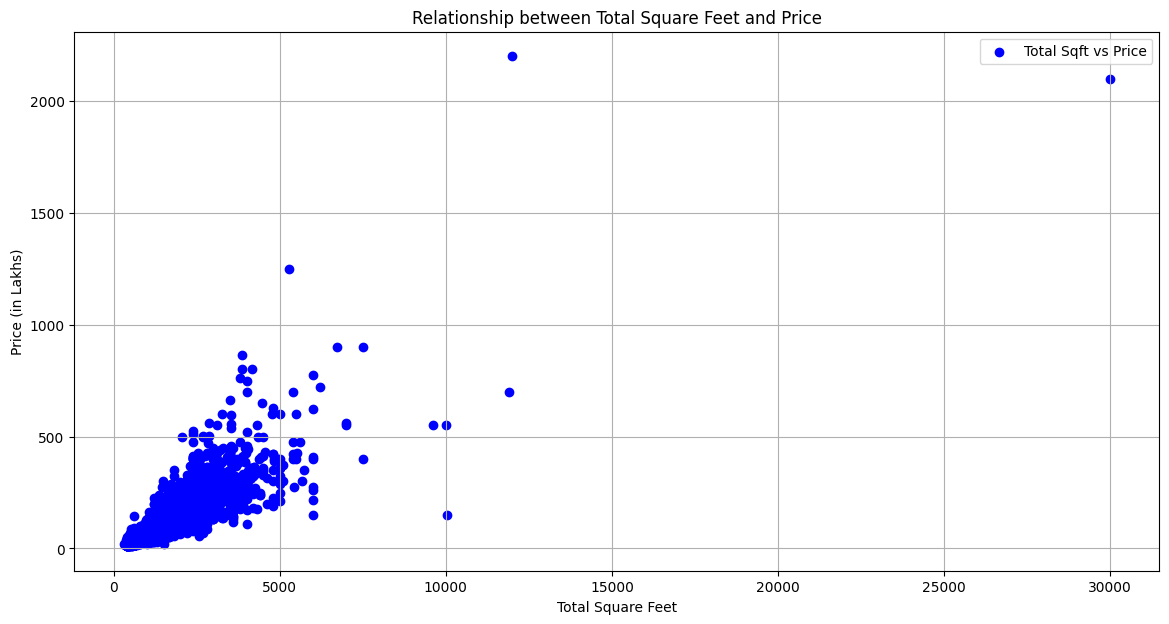

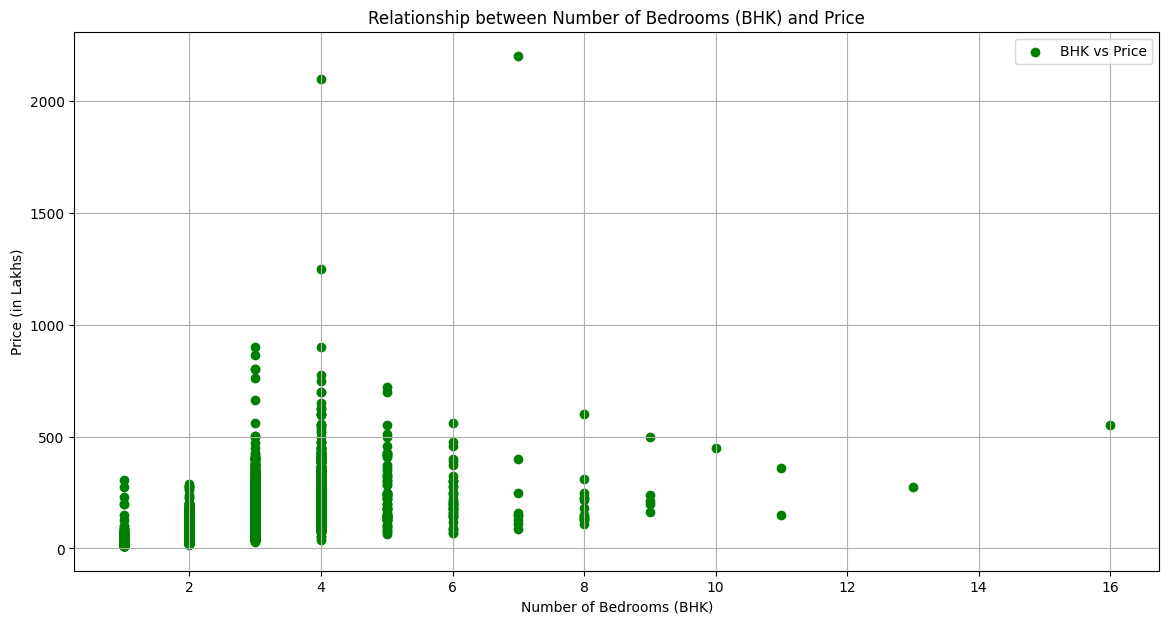

In [212]:
# Visualize the relationship between total_sqft and price
plt.figure(figsize=(14, 7))
plt.scatter(data12['total_sqft'], data12['price'], color='blue', label='Total Sqft vs Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.title('Relationship between Total Square Feet and Price')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the relationship between bhk and price
plt.figure(figsize=(14, 7))
plt.scatter(data12['bhk'], data12['price'], color='green', label='BHK vs Price')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price (in Lakhs)')
plt.title('Relationship between Number of Bedrooms (BHK) and Price')
plt.legend()
plt.grid(True)
plt.show()

In [210]:
lr_clf = LinearRegression()     # first trying training with LinearRegression
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874376

In [211]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)     # ShuffleSplit is just a another type of splitting data
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])


We decided to use linear regression to best fit this data. One reason for this choice is the clear positive correlation observed between total square feet and price, as well as between the number of bedrooms (BHK) and price. These linear trends indicate that as property size or number of bedrooms increases, prices generally increase. Linear regression effectively captures these relationships, providing accurate and interpretable predictions. The simplicity and clarity of the model's coefficients make it an ideal choice for predicting property prices based on these key features.

#  Prediction Time
Predicting the prices using LinearRegression in Lakhs.

In [213]:
def predict_price(location,sqft,bath,bhk):
    '''
    Function which helps to actually predict the prices.
    '''
    loc_index = np.where(X.columns==location)[0][0]     # np.where() function returns the indices of elements in an input array where the given condition is satisfied.

    x = np.zeros(len(X.columns))    # np.zeros() function returns a new array of given shape and type, with zeros.
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [214]:
print(predict_price('1st Phase JP Nagar', 1000, 2, 3).round(3),'Lakhs')

81.726 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Insights and conclusions

After collecting data, exploring our dataset, and applying a linear regression model, we have reached a clear conclusion regarding property prices in Bengaluru. We observed linear relationships between total square feet, number of bedrooms (BHK), and property prices. Our model effectively captured these trends, providing accurate and interpretable price predictions. This analysis shows that property size and the number of bedrooms significantly influence prices. By following this approach, you should now have a better understanding of how to build and interpret a linear regression model for real estate price prediction, aiding homebuyers, real estate developers, and policymakers in making informed decisions.






